# Cellular automaton model in 1 horizontal dimension 

## Value is 0 or 1 
### Probability kernel is conditional function of that 
### Total probability is conditional plus unconditional 

In [1]:
# This magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline

# plt.xkcd() # whiteboard style to plots

Populating the interactive namespace from numpy and matplotlib


# Basic function: cumsum(), renormalized to 1 

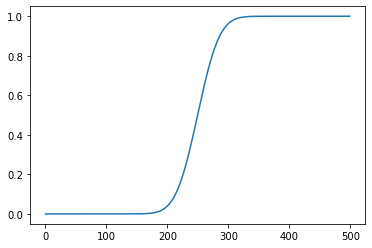

In [51]:
# Probability and spike creation
Prob = exp(- ((x-250)/40)**2 )
a = cumsum(Prob)/sum(Prob)
plot(x, a)

# Make a dispatcher of events based on probability field

In [54]:
# A function to put in N events according to CDF = cumsum(Prob)/sum(Prob)
def dispatch(CDF, N):
    conv_now = 0*CDF.copy()
    # explicit loop is probably not the most efficient 
    for i in arange(N):
        # the closest place to where a uniform rand() equals the cumulative probability 
        idx = (abs( rand(1) - CDF) ).argmin() 
        conv_now[idx] = 1
    return(conv_now)

## Utilities: a smoother to smear probability near prior events

In [6]:
def smooth_boxcar(array1d, kernel_size): 
    kernel = np.ones(kernel_size) / kernel_size
    return(np.convolve(array1d, kernel, mode='same'))

In [46]:
def smooth_cyclic( signal, ker ):
    '''
        signal: real 1D array
        ker: real 1D array
        signal and ker must have same shape
    '''
    return np.real(np.fft.ifft( np.fft.fft(signal)*np.fft.fft(ker) ))

# Initialize domain and periodic smoothing kernels

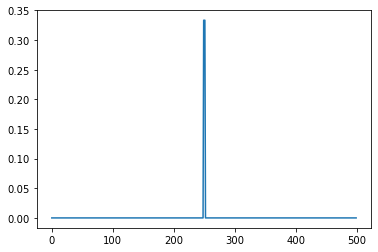

In [121]:
x = arange(500)
boxcar3 = x.copy()*0.0; boxcar3[249:252] = 1./3 # Kernel function for a cyclic smoother
boxcar6 = x.copy()*0.0; boxcar6[247:254] = 1./6 # Kernel function for a cyclic smoother
plot(boxcar3)

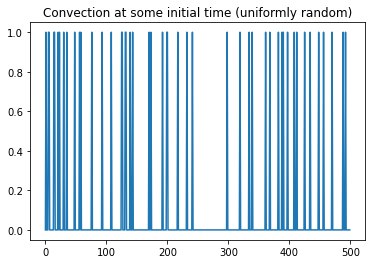

In [122]:
# test dispatch
Prob = x.copy()*0.0 + 1
conv_now = dispatch(cumsum(Prob)/sum(Prob), 50)
plot(conv_now); title('Convection at some initial time (uniformly random)');

In [123]:
cond = smooth_cyclic(conv_now, boxcar3)
sum(cond)

48.0

# Probability model: conditional plus unconditional

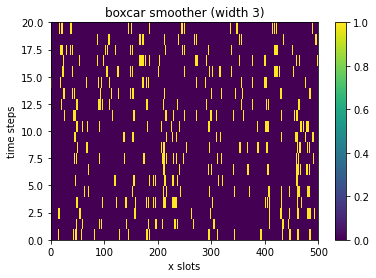

In [130]:
# Initial conv is N ones and size(x)-N zeros.
conv = conv_now 

conprob = smooth_cyclic(conv_now, boxcar3) # initially from above
uncon = sum(cond) * 0.01

# Run for N time steps 
for i in arange(19):
    # Prob = smooth_cyc(conv_now,ker) # seems to have a bias 
    Prob = smooth_cyc(conv_now, boxcar3) + uncon*0.01
    conv_now = dispatch(cumsum(Prob)/sum(Prob), 50)
    conv = np.vstack([conv,conv_now])

pcolor(conv)
xlabel('x slots'); ylabel('time steps')
title('boxcar smoother (width 3)')
colorbar()

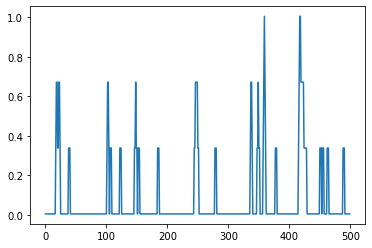

In [131]:
plot(Prob)

Text(0.5, 1.0, 'Convection probability = boxcar smoother (width 3)')

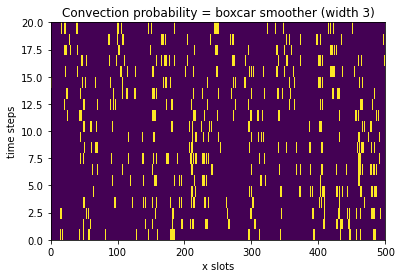

In [132]:
pcolor(conv)
xlabel('x slots'); ylabel('time steps')
title('Convection probability = boxcar smoother (width 3)')